In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/pca_fw.csv', encoding="UTF-8")
data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2
0,Lucas Alario,FW,Leverkusen,26,13.0,0.486486,0.600000,0.000000,0.26,0.33,0.434211,0.497537,0.351682,0.000000,0.230769,0.000000,0.411439,0.37500,0.262411,0.053763,0.112861,0.300000,0.250774,0.762,0.301843,0.076,0.200000,0.151920,0.056047,0.066083,0.480192,False,0.426437,-0.655474
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.360360,0.455556,0.098039,0.36,0.31,0.434211,0.216749,0.204893,0.106509,0.147157,0.099237,0.284133,0.40000,0.159574,0.080645,0.175853,0.204878,0.218266,0.595,0.209677,0.100,0.062963,0.227045,0.119469,0.094745,0.619448,False,0.274289,-0.682535
2,Leon Bailey,FW,Leverkusen,21,12.1,0.369369,0.388889,0.411765,0.32,0.45,0.539474,0.352217,0.532110,0.092702,0.662207,0.564885,0.625461,0.38500,0.237589,0.241935,0.333333,0.865854,0.947368,0.581,0.838710,0.496,0.337037,0.337229,0.585546,0.351911,0.528211,False,1.248090,0.499119
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.234234,0.200000,0.274510,0.34,0.38,0.539474,0.428571,0.403670,0.093688,0.344482,0.328244,0.457565,0.37000,0.195035,0.177419,0.199475,0.551220,0.634675,0.552,0.562212,0.316,0.396296,0.207012,0.227139,0.252389,0.551020,False,0.736856,-0.060931
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.225225,0.422222,0.529412,0.14,0.16,0.289474,0.379310,0.464832,0.117357,0.615385,0.534351,0.560886,0.16625,0.464539,0.247312,0.418635,0.770732,0.852941,0.575,0.771889,0.646,0.892593,0.457429,0.625369,0.285032,0.266507,False,1.277554,0.653934


In [2]:
pcas = data[['PC1', 'PC2']]
pcas.head()

,PC1,PC2
0,0.426437,-0.655474
1,0.274289,-0.682535
2,1.248090,0.499119
3,0.736856,-0.060931
4,1.277554,0.653934


Text(0, 0.5, 'Inertia')

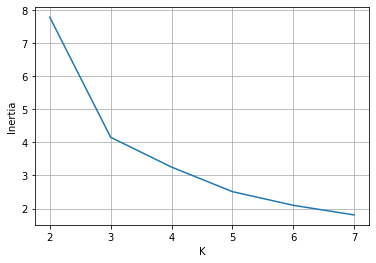

In [3]:
inertias = []
clusters = range(2, 8)
for k in clusters:
    k2 = KMeans(n_clusters=k)
    k2.fit(pcas)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(inertias, index=clusters).plot(ax=ax)
plt.grid()
ax.set_xlabel('K')
ax.set_ylabel('Inertia')

In [4]:
# nach K=4 nur noch geringe Abnahme, daher werden K=4 Cluster erstellt.
km = KMeans(4)
km.fit(pcas)
KMeans(algorithm='auto', copy_x=True, init='k-means', 
      max_iter=300, n_clusters=4, n_init=10, n_jobs=1,
      precompute_distances='auto')

KMeans(init='k-means', n_clusters=4, n_jobs=1, precompute_distances='auto')

In [5]:
X_km = km.predict(pcas)
X_km

array([3, 3, 1, 0, 1, 0, 3, 1, 0, 3, 2, 1, 3, 0, 3, 1, 3, 2, 0, 3, 0, 2,
       3, 3, 1, 2, 0, 0, 0, 0, 3, 3, 3, 2, 2, 3, 2, 0, 2, 2, 0, 3, 3, 0,
       2, 3, 3, 0, 1, 3, 2, 3, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 0, 3],
      dtype=int32)

In [6]:
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2
0,Lucas Alario,FW,Leverkusen,26,13.0,0.486486,0.600000,0.000000,0.26,0.33,0.434211,0.497537,0.351682,0.000000,0.230769,0.000000,0.411439,0.37500,0.262411,0.053763,0.112861,0.300000,0.250774,0.762,0.301843,0.076,0.200000,0.151920,0.056047,0.066083,0.480192,False,0.426437,-0.655474
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.360360,0.455556,0.098039,0.36,0.31,0.434211,0.216749,0.204893,0.106509,0.147157,0.099237,0.284133,0.40000,0.159574,0.080645,0.175853,0.204878,0.218266,0.595,0.209677,0.100,0.062963,0.227045,0.119469,0.094745,0.619448,False,0.274289,-0.682535
2,Leon Bailey,FW,Leverkusen,21,12.1,0.369369,0.388889,0.411765,0.32,0.45,0.539474,0.352217,0.532110,0.092702,0.662207,0.564885,0.625461,0.38500,0.237589,0.241935,0.333333,0.865854,0.947368,0.581,0.838710,0.496,0.337037,0.337229,0.585546,0.351911,0.528211,False,1.248090,0.499119
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.234234,0.200000,0.274510,0.34,0.38,0.539474,0.428571,0.403670,0.093688,0.344482,0.328244,0.457565,0.37000,0.195035,0.177419,0.199475,0.551220,0.634675,0.552,0.562212,0.316,0.396296,0.207012,0.227139,0.252389,0.551020,False,0.736856,-0.060931
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.225225,0.422222,0.529412,0.14,0.16,0.289474,0.379310,0.464832,0.117357,0.615385,0.534351,0.560886,0.16625,0.464539,0.247312,0.418635,0.770732,0.852941,0.575,0.771889,0.646,0.892593,0.457429,0.625369,0.285032,0.266507,False,1.277554,0.653934
5,Leonardo Bittencourt,FW,Werder Bremen,25,21.0,0.171171,0.177778,0.294118,0.20,0.36,0.486842,0.502463,0.495413,0.156805,0.478261,0.511450,0.658672,0.22500,0.102837,0.435484,0.409449,0.302439,0.413313,0.464,0.341014,0.362,0.192593,0.368948,0.393805,0.273885,0.337335,False,0.594906,0.185032
6,Guido Burgstaller,FW,Schalke 04,30,13.7,0.000000,0.366667,0.137255,0.00,0.00,0.000000,0.369458,0.177370,0.041420,0.193980,0.000000,0.335793,0.15625,0.148936,0.166667,0.093176,0.356098,0.373065,0.606,0.370968,0.088,0.055556,0.100167,0.097345,0.143312,0.313325,False,0.330881,-0.615714
7,Kingsley Coman,FW,Bayern Munich,23,16.7,0.216216,0.277778,0.450980,0.22,0.27,0.434211,0.571429,0.605505,0.102564,0.682274,0.458015,0.839483,0.52875,0.421986,0.037634,0.456693,0.875610,0.936533,0.594,0.896313,0.526,0.996296,0.547579,0.662242,0.366242,0.583433,False,1.306087,0.878600
8,Matheus Cunha,FW,Hertha BSC,20,8.3,0.657658,0.444444,0.098039,0.34,0.40,0.881579,0.376847,0.256881,0.192308,0.321070,0.091603,0.621771,0.45500,0.184397,0.360215,0.141732,1.000000,0.801858,0.791,1.000000,0.506,0.444444,0.115192,0.190265,0.433917,0.480192,True,1.023950,0.047304
9,Jhon Córdoba,FW,Köln,26,22.2,0.531532,0.477778,0.137255,0.40,0.50,0.644737,0.613300,0.275229,0.021696,0.107023,0.000000,0.498155,0.34125,0.180851,0.145161,0.078740,0.285366,0.334365,0.542,0.281106,0.136,0.218519,0.096828,0.073746,0.102707,0.452581,False,0.482022,-0.651993


In [7]:
clusters = pd.DataFrame(X_km)
data = pd.concat([data, clusters], axis=1)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,0
0,Lucas Alario,FW,Leverkusen,26,13.0,0.486486,0.600000,0.000000,0.26,0.33,0.434211,0.497537,0.351682,0.000000,0.230769,0.000000,0.411439,0.37500,0.262411,0.053763,0.112861,0.300000,0.250774,0.762,0.301843,0.076,0.200000,0.151920,0.056047,0.066083,0.480192,False,0.426437,-0.655474,3
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.360360,0.455556,0.098039,0.36,0.31,0.434211,0.216749,0.204893,0.106509,0.147157,0.099237,0.284133,0.40000,0.159574,0.080645,0.175853,0.204878,0.218266,0.595,0.209677,0.100,0.062963,0.227045,0.119469,0.094745,0.619448,False,0.274289,-0.682535,3
2,Leon Bailey,FW,Leverkusen,21,12.1,0.369369,0.388889,0.411765,0.32,0.45,0.539474,0.352217,0.532110,0.092702,0.662207,0.564885,0.625461,0.38500,0.237589,0.241935,0.333333,0.865854,0.947368,0.581,0.838710,0.496,0.337037,0.337229,0.585546,0.351911,0.528211,False,1.248090,0.499119,1
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.234234,0.200000,0.274510,0.34,0.38,0.539474,0.428571,0.403670,0.093688,0.344482,0.328244,0.457565,0.37000,0.195035,0.177419,0.199475,0.551220,0.634675,0.552,0.562212,0.316,0.396296,0.207012,0.227139,0.252389,0.551020,False,0.736856,-0.060931,0
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.225225,0.422222,0.529412,0.14,0.16,0.289474,0.379310,0.464832,0.117357,0.615385,0.534351,0.560886,0.16625,0.464539,0.247312,0.418635,0.770732,0.852941,0.575,0.771889,0.646,0.892593,0.457429,0.625369,0.285032,0.266507,False,1.277554,0.653934,1
5,Leonardo Bittencourt,FW,Werder Bremen,25,21.0,0.171171,0.177778,0.294118,0.20,0.36,0.486842,0.502463,0.495413,0.156805,0.478261,0.511450,0.658672,0.22500,0.102837,0.435484,0.409449,0.302439,0.413313,0.464,0.341014,0.362,0.192593,0.368948,0.393805,0.273885,0.337335,False,0.594906,0.185032,0
6,Guido Burgstaller,FW,Schalke 04,30,13.7,0.000000,0.366667,0.137255,0.00,0.00,0.000000,0.369458,0.177370,0.041420,0.193980,0.000000,0.335793,0.15625,0.148936,0.166667,0.093176,0.356098,0.373065,0.606,0.370968,0.088,0.055556,0.100167,0.097345,0.143312,0.313325,False,0.330881,-0.615714,3
7,Kingsley Coman,FW,Bayern Munich,23,16.7,0.216216,0.277778,0.450980,0.22,0.27,0.434211,0.571429,0.605505,0.102564,0.682274,0.458015,0.839483,0.52875,0.421986,0.037634,0.456693,0.875610,0.936533,0.594,0.896313,0.526,0.996296,0.547579,0.662242,0.366242,0.583433,False,1.306087,0.878600,1
8,Matheus Cunha,FW,Hertha BSC,20,8.3,0.657658,0.444444,0.098039,0.34,0.40,0.881579,0.376847,0.256881,0.192308,0.321070,0.091603,0.621771,0.45500,0.184397,0.360215,0.141732,1.000000,0.801858,0.791,1.000000,0.506,0.444444,0.115192,0.190265,0.433917,0.480192,True,1.023950,0.047304,0
9,Jhon Córdoba,FW,Köln,26,22.2,0.531532,0.477778,0.137255,0.40,0.50,0.644737,0.613300,0.275229,0.021696,0.107023,0.000000,0.498155,0.34125,0.180851,0.145161,0.078740,0.285366,0.334365,0.542,0.281106,0.136,0.218519,0.096828,0.073746,0.102707,0.452581,False,0.482022,-0.651993,3


In [8]:
data.rename(columns={0: 'Cluster'}, inplace=True)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,Cluster
0,Lucas Alario,FW,Leverkusen,26,13.0,0.486486,0.600000,0.000000,0.26,0.33,0.434211,0.497537,0.351682,0.000000,0.230769,0.000000,0.411439,0.37500,0.262411,0.053763,0.112861,0.300000,0.250774,0.762,0.301843,0.076,0.200000,0.151920,0.056047,0.066083,0.480192,False,0.426437,-0.655474,3
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.360360,0.455556,0.098039,0.36,0.31,0.434211,0.216749,0.204893,0.106509,0.147157,0.099237,0.284133,0.40000,0.159574,0.080645,0.175853,0.204878,0.218266,0.595,0.209677,0.100,0.062963,0.227045,0.119469,0.094745,0.619448,False,0.274289,-0.682535,3
2,Leon Bailey,FW,Leverkusen,21,12.1,0.369369,0.388889,0.411765,0.32,0.45,0.539474,0.352217,0.532110,0.092702,0.662207,0.564885,0.625461,0.38500,0.237589,0.241935,0.333333,0.865854,0.947368,0.581,0.838710,0.496,0.337037,0.337229,0.585546,0.351911,0.528211,False,1.248090,0.499119,1
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.234234,0.200000,0.274510,0.34,0.38,0.539474,0.428571,0.403670,0.093688,0.344482,0.328244,0.457565,0.37000,0.195035,0.177419,0.199475,0.551220,0.634675,0.552,0.562212,0.316,0.396296,0.207012,0.227139,0.252389,0.551020,False,0.736856,-0.060931,0
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.225225,0.422222,0.529412,0.14,0.16,0.289474,0.379310,0.464832,0.117357,0.615385,0.534351,0.560886,0.16625,0.464539,0.247312,0.418635,0.770732,0.852941,0.575,0.771889,0.646,0.892593,0.457429,0.625369,0.285032,0.266507,False,1.277554,0.653934,1
5,Leonardo Bittencourt,FW,Werder Bremen,25,21.0,0.171171,0.177778,0.294118,0.20,0.36,0.486842,0.502463,0.495413,0.156805,0.478261,0.511450,0.658672,0.22500,0.102837,0.435484,0.409449,0.302439,0.413313,0.464,0.341014,0.362,0.192593,0.368948,0.393805,0.273885,0.337335,False,0.594906,0.185032,0
6,Guido Burgstaller,FW,Schalke 04,30,13.7,0.000000,0.366667,0.137255,0.00,0.00,0.000000,0.369458,0.177370,0.041420,0.193980,0.000000,0.335793,0.15625,0.148936,0.166667,0.093176,0.356098,0.373065,0.606,0.370968,0.088,0.055556,0.100167,0.097345,0.143312,0.313325,False,0.330881,-0.615714,3
7,Kingsley Coman,FW,Bayern Munich,23,16.7,0.216216,0.277778,0.450980,0.22,0.27,0.434211,0.571429,0.605505,0.102564,0.682274,0.458015,0.839483,0.52875,0.421986,0.037634,0.456693,0.875610,0.936533,0.594,0.896313,0.526,0.996296,0.547579,0.662242,0.366242,0.583433,False,1.306087,0.878600,1
8,Matheus Cunha,FW,Hertha BSC,20,8.3,0.657658,0.444444,0.098039,0.34,0.40,0.881579,0.376847,0.256881,0.192308,0.321070,0.091603,0.621771,0.45500,0.184397,0.360215,0.141732,1.000000,0.801858,0.791,1.000000,0.506,0.444444,0.115192,0.190265,0.433917,0.480192,True,1.023950,0.047304,0
9,Jhon Córdoba,FW,Köln,26,22.2,0.531532,0.477778,0.137255,0.40,0.50,0.644737,0.613300,0.275229,0.021696,0.107023,0.000000,0.498155,0.34125,0.180851,0.145161,0.078740,0.285366,0.334365,0.542,0.281106,0.136,0.218519,0.096828,0.073746,0.102707,0.452581,False,0.482022,-0.651993,3


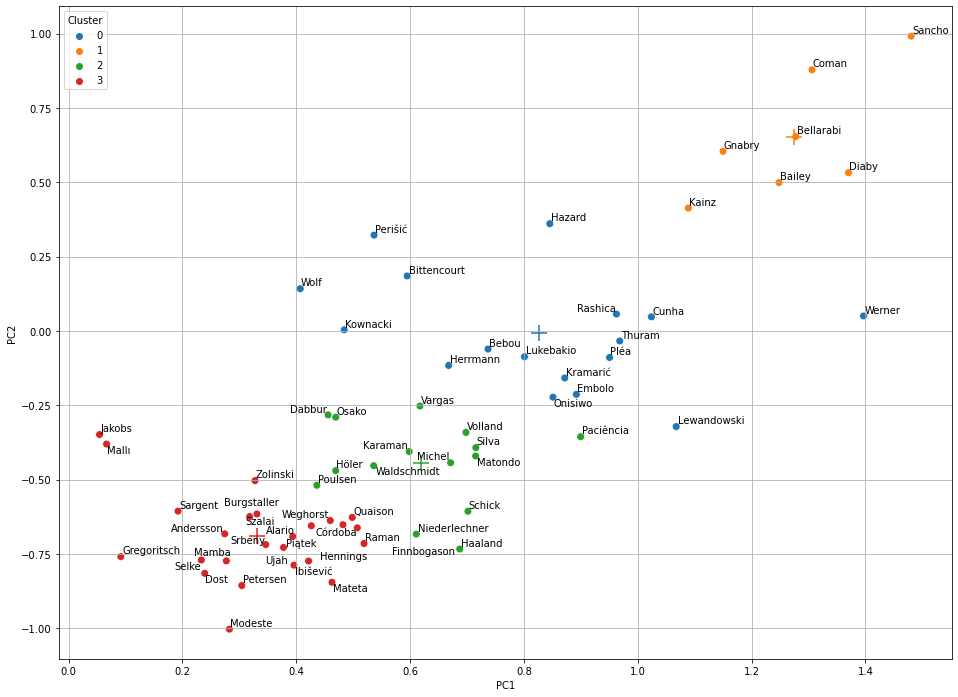

In [9]:
from adjustText import adjust_text
import seaborn as sns

x=data['PC1']
y=data['PC2']
colors = ['tab:blue','tab:orange','tab:green','tab:red']

plt.figure(figsize=(16,12))
plt.grid()
sns.scatterplot(x=x, y=y, hue=data['Cluster'], s=60, palette='tab10')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', s=250, c=colors)

surnames = data['Player'].str.split(' ').str[-1]
labels = [plt.text(x_coor, y_coor, f'{i}') for (x_coor, y_coor, i) in zip(x, y, surnames)]

adjust_text(labels)
plt.savefig('K_FW.png')
plt.show()

In [10]:
org_data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_fw.csv', encoding="UTF-8")
org_data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered
0,Lucas Alario,FW,Leverkusen,26,13.0,0.54,0.54,NaN,0.13,0.33,-0.01,73.7,1.15,0.46,0.69,0.00,2.23,30.0,27.6,0.15,35.8,1.23,1.62,76.2,1.31,0.38,0.54,26.8,0.38,3.77,40.0,False
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.40,0.41,0.05,0.18,0.31,-0.01,62.3,0.67,1.54,0.44,0.13,1.54,32.0,24.7,0.20,40.6,0.84,1.41,59.5,0.91,0.50,0.17,31.3,0.81,4.13,51.6,False
2,Leon Bailey,FW,Leverkusen,21,12.1,0.41,0.35,0.21,0.16,0.45,0.07,67.8,1.74,1.40,1.98,0.74,3.39,30.8,26.9,0.50,52.6,3.55,6.12,58.1,3.64,2.48,0.91,37.9,3.97,7.36,44.0,False
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.26,0.18,0.14,0.17,0.38,0.07,70.9,1.32,1.41,1.03,0.43,2.48,29.6,25.7,0.38,42.4,2.26,4.10,55.2,2.44,1.58,1.07,30.1,1.54,6.11,45.9,False
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.25,0.38,0.27,0.07,0.16,-0.12,68.9,1.52,1.65,1.84,0.70,3.04,13.3,33.3,0.51,59.1,3.16,5.51,57.5,3.35,3.23,2.41,45.1,4.24,6.52,22.2,False


In [11]:
org_data = pd.concat([org_data, clusters], axis=1)
org_data.rename(columns={0: 'Cluster'}, inplace=True)
org_data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,Lucas Alario,FW,Leverkusen,26,13.0,0.54,0.54,NaN,0.13,0.33,-0.01,73.7,1.15,0.46,0.69,0.00,2.23,30.0,27.6,0.15,35.8,1.23,1.62,76.2,1.31,0.38,0.54,26.8,0.38,3.77,40.0,False,3
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.40,0.41,0.05,0.18,0.31,-0.01,62.3,0.67,1.54,0.44,0.13,1.54,32.0,24.7,0.20,40.6,0.84,1.41,59.5,0.91,0.50,0.17,31.3,0.81,4.13,51.6,False,3
2,Leon Bailey,FW,Leverkusen,21,12.1,0.41,0.35,0.21,0.16,0.45,0.07,67.8,1.74,1.40,1.98,0.74,3.39,30.8,26.9,0.50,52.6,3.55,6.12,58.1,3.64,2.48,0.91,37.9,3.97,7.36,44.0,False,1
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.26,0.18,0.14,0.17,0.38,0.07,70.9,1.32,1.41,1.03,0.43,2.48,29.6,25.7,0.38,42.4,2.26,4.10,55.2,2.44,1.58,1.07,30.1,1.54,6.11,45.9,False,0
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.25,0.38,0.27,0.07,0.16,-0.12,68.9,1.52,1.65,1.84,0.70,3.04,13.3,33.3,0.51,59.1,3.16,5.51,57.5,3.35,3.23,2.41,45.1,4.24,6.52,22.2,False,1
5,Leonardo Bittencourt,FW,Werder Bremen,25,21.0,0.19,0.16,0.15,0.10,0.36,0.03,73.9,1.62,2.05,1.43,0.67,3.57,18.0,23.1,0.86,58.4,1.24,2.67,46.4,1.48,1.81,0.52,39.8,2.67,6.38,28.1,False,0
6,Guido Burgstaller,FW,Schalke 04,30,13.7,0.00,0.33,0.07,0.00,0.00,-0.34,68.5,0.58,0.88,0.58,0.00,1.82,12.5,24.4,0.36,34.3,1.46,2.41,60.6,1.61,0.44,0.15,23.7,0.66,4.74,26.1,False,3
7,Kingsley Coman,FW,Bayern Munich,23,16.7,0.24,0.25,0.23,0.11,0.27,-0.01,76.7,1.98,1.50,2.04,0.60,4.55,42.3,32.1,0.12,62.0,3.59,6.05,59.4,3.89,2.63,2.69,50.5,4.49,7.54,48.6,False,1
8,Matheus Cunha,FW,Hertha BSC,20,8.3,0.73,0.40,0.05,0.17,0.40,0.33,68.8,0.84,2.41,0.96,0.12,3.37,36.4,25.4,0.72,38.0,4.10,5.18,79.1,4.34,2.53,1.20,24.6,1.29,8.39,40.0,True,0
9,Jhon Córdoba,FW,Köln,26,22.2,0.59,0.43,0.07,0.20,0.50,0.15,78.4,0.90,0.68,0.32,0.00,2.70,27.3,25.3,0.32,33.2,1.17,2.16,54.2,1.22,0.68,0.59,23.5,0.50,4.23,37.7,False,3


In [12]:
org_data.to_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_fw.csv', encoding="UTF-8")

In [13]:
average = data.assign(cluster=clusters).groupby('cluster').agg('mean', 'var').T

In [14]:
average

cluster,0,1,2,3
Age,24.764706,23.142857,24.333333,26.680000
90s,20.382353,18.771429,17.766667,16.532000
Gls,0.374669,0.334620,0.417417,0.280360
xG,0.409804,0.365079,0.439259,0.366222
xA,0.382930,0.591036,0.274510,0.163137
G/Sh,0.287059,0.291429,0.324000,0.257600
G/SoT,0.347647,0.325714,0.410000,0.328400
G-xG,0.508514,0.505639,0.535088,0.420526
Cmp%,0.450304,0.480999,0.405419,0.340985
KP,0.430833,0.625164,0.342712,0.255535


In [15]:
average

cluster,0,1,2,3
Age,24.764706,23.142857,24.333333,26.680000
90s,20.382353,18.771429,17.766667,16.532000
Gls,0.374669,0.334620,0.417417,0.280360
xG,0.409804,0.365079,0.439259,0.366222
xA,0.382930,0.591036,0.274510,0.163137
G/Sh,0.287059,0.291429,0.324000,0.257600
G/SoT,0.347647,0.325714,0.410000,0.328400
G-xG,0.508514,0.505639,0.535088,0.420526
Cmp%,0.450304,0.480999,0.405419,0.340985
KP,0.430833,0.625164,0.342712,0.255535


In [16]:
average

cluster,0,1,2,3
Age,24.764706,23.142857,24.333333,26.680000
90s,20.382353,18.771429,17.766667,16.532000
Gls,0.374669,0.334620,0.417417,0.280360
xG,0.409804,0.365079,0.439259,0.366222
xA,0.382930,0.591036,0.274510,0.163137
G/Sh,0.287059,0.291429,0.324000,0.257600
G/SoT,0.347647,0.325714,0.410000,0.328400
G-xG,0.508514,0.505639,0.535088,0.420526
Cmp%,0.450304,0.480999,0.405419,0.340985
KP,0.430833,0.625164,0.342712,0.255535


In [17]:
goals = average.iloc[[2,3,7]]
goals

cluster,0,1,2,3
Gls,0.374669,0.334620,0.417417,0.280360
xG,0.409804,0.365079,0.439259,0.366222
G-xG,0.508514,0.505639,0.535088,0.420526


In [18]:
passing = average.iloc[[4,9,11,12,13]]
passing

cluster,0,1,2,3
xA,0.382930,0.591036,0.274510,0.163137
KP,0.430833,0.625164,0.342712,0.255535
PPA,0.392878,0.639274,0.236120,0.139666
CrsPA,0.254603,0.466739,0.071756,0.046718
SCA,0.582158,0.722720,0.498278,0.361033


In [19]:
dribbling = average.iloc[[17,18,19,21,22,23]]
dribbling

cluster,0,1,2,3
Touches,0.240929,0.415823,0.138145,0.093596
Succ,0.526542,0.757143,0.343252,0.215512
Att,0.557093,0.822424,0.431166,0.235851
#Pl,0.534833,0.769585,0.362366,0.218249
Carr into 1/3,0.327059,0.550286,0.204000,0.133440
CPA,0.413943,0.638624,0.237037,0.136148


In [20]:
other = average.iloc[[15,26,27]]
other

cluster,0,1,2,3
%,0.229453,0.337893,0.231442,0.181560
Recov,0.246347,0.290264,0.146497,0.125987
Won%,0.469176,0.313668,0.454102,0.484562


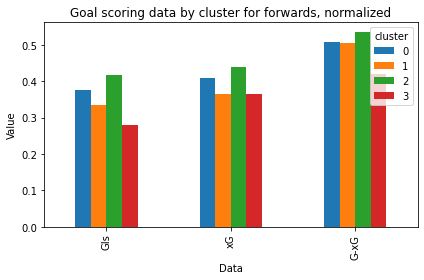

In [34]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
goals.plot(kind='bar', color=colors)
plt.title("Goal scoring data by cluster for forwards, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('FW_Goals.png')

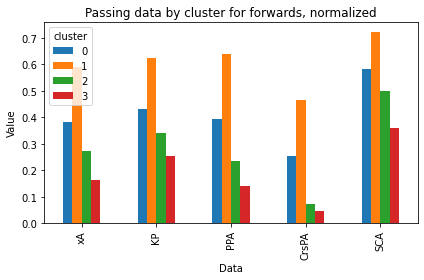

In [35]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
passing.plot(kind='bar', color=colors)
plt.style.use('seaborn-deep') 
plt.title("Passing data by cluster for forwards, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('FW_Passes.png')

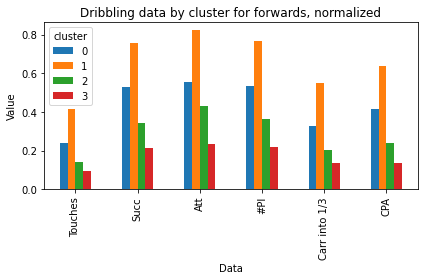

In [36]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
dribbling.plot(kind='bar', color=colors)
plt.style.use('seaborn-deep') 
plt.title("Dribbling data by cluster for forwards, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('FW_dribbling.png')

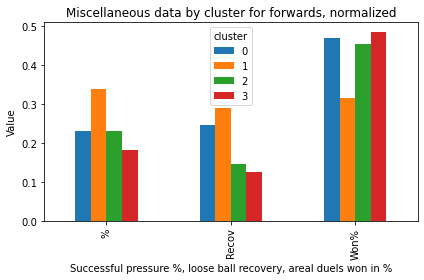

In [37]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
other.plot(kind='bar', color=colors)
plt.style.use('seaborn-deep') 
plt.title("Miscellaneous data by cluster for forwards, normalized")
plt.xlabel("Successful pressure %, loose ball recovery, areal duels won in %")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('FW_Other.png')

In [25]:
org_data[org_data['Cluster'] == 0]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
3,Ihlas Bebou,FW,Hoffenheim,25,23.4,0.26,0.18,0.14,0.17,0.38,0.07,70.9,1.32,1.41,1.03,0.43,2.48,29.6,25.7,0.38,42.4,2.26,4.10,55.2,2.44,1.58,1.07,30.1,1.54,6.11,45.9,False,0
5,Leonardo Bittencourt,FW,Werder Bremen,25,21.0,0.19,0.16,0.15,0.10,0.36,0.03,73.9,1.62,2.05,1.43,0.67,3.57,18.0,23.1,0.86,58.4,1.24,2.67,46.4,1.48,1.81,0.52,39.8,2.67,6.38,28.1,False,0
8,Matheus Cunha,FW,Hertha BSC,20,8.3,0.73,0.40,0.05,0.17,0.40,0.33,68.8,0.84,2.41,0.96,0.12,3.37,36.4,25.4,0.72,38.0,4.10,5.18,79.1,4.34,2.53,1.20,24.6,1.29,8.39,40.0,True,0
13,Breel Embolo,FW,M'Gladbach,22,17.2,0.46,0.52,0.28,0.18,0.44,-0.06,75.4,1.16,1.40,0.64,0.06,3.26,35.3,24.1,0.29,40.8,2.09,4.83,43.4,2.38,1.63,0.87,30.3,0.29,5.52,30.0,False,0
18,Thorgan Hazard,FW,Dortmund,26,26.4,0.26,0.21,0.28,0.14,0.33,0.06,76.8,2.16,2.23,1.44,0.27,3.94,28.3,26.4,0.53,59.2,2.12,3.67,57.7,2.31,2.08,1.44,44.5,1.74,6.17,35.4,False,0
20,Patrick Herrmann,FW,M'Gladbach,28,16.1,0.37,0.48,0.32,0.15,0.40,-0.11,70.9,1.55,1.24,1.30,0.31,2.86,23.5,29.0,0.43,44.5,0.99,1.37,72.7,1.12,1.55,1.06,31.6,2.98,6.15,38.9,False,0
26,Dawid Kownacki,FW,Düsseldorf,22,12.1,0.00,0.16,0.05,0.00,0.00,-0.17,68.8,0.91,0.83,0.91,0.25,2.81,35.3,32.3,0.91,41.1,2.64,4.88,54.2,2.73,1.40,0.74,26.7,1.07,7.19,43.4,False,0
27,Andrej Kramarić,FW,Hoffenheim,28,15.8,0.76,0.59,0.20,0.25,0.50,0.17,80.3,1.46,1.65,1.46,0.13,3.16,11.1,28.4,0.13,45.5,1.65,2.28,72.2,1.65,2.28,1.08,35.6,1.27,4.94,29.6,False,0
28,Robert Lewandowski,FW,Bayern Munich,30,30.7,1.11,0.90,0.19,0.22,0.49,0.21,75.6,1.21,1.17,1.40,0.23,3.32,12.5,31.8,0.13,39.2,1.95,3.45,56.6,2.28,1.43,0.91,32.6,0.88,3.42,56.9,False,0
29,Dodi Lukebakio,FW,Hertha BSC,21,22.6,0.31,0.27,0.22,0.18,0.39,0.04,75.4,1.55,1.24,0.88,0.35,2.92,27.6,24.1,0.35,41.2,2.39,3.63,65.9,2.57,1.19,0.75,28.4,1.95,6.06,36.4,False,0


In [26]:
org_data[org_data['Cluster'] == 1]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
2,Leon Bailey,FW,Leverkusen,21,12.1,0.41,0.35,0.21,0.16,0.45,0.07,67.8,1.74,1.40,1.98,0.74,3.39,30.8,26.9,0.50,52.6,3.55,6.12,58.1,3.64,2.48,0.91,37.9,3.97,7.36,44.0,False,1
4,Karim Bellarabi,FW,Leverkusen,29,15.8,0.25,0.38,0.27,0.07,0.16,-0.12,68.9,1.52,1.65,1.84,0.70,3.04,13.3,33.3,0.51,59.1,3.16,5.51,57.5,3.35,3.23,2.41,45.1,4.24,6.52,22.2,False,1
7,Kingsley Coman,FW,Bayern Munich,23,16.7,0.24,0.25,0.23,0.11,0.27,-0.01,76.7,1.98,1.50,2.04,0.60,4.55,42.3,32.1,0.12,62.0,3.59,6.05,59.4,3.89,2.63,2.69,50.5,4.49,7.54,48.6,False,1
11,Moussa Diaby,FW,Leverkusen,20,19.7,0.25,0.24,0.24,0.12,0.22,0.01,73.6,1.73,1.22,1.37,0.71,3.40,15.4,29.4,0.41,48.1,3.65,5.94,61.5,4.11,2.54,2.08,39.1,4.31,5.99,17.6,False,1
15,Serge Gnabry,FW,Bayern Munich,24,24.4,0.49,0.52,0.40,0.13,0.30,-0.03,78.3,1.93,1.72,1.89,0.29,4.02,35.1,31.6,0.70,60.2,2.62,4.39,59.8,2.83,2.99,1.84,48.0,2.99,6.23,22.7,False,1
24,Florian Kainz,FW,Köln,26,17.3,0.29,0.20,0.41,0.10,0.27,0.09,62.4,2.77,2.95,2.02,1.04,4.10,30.8,23.0,0.35,54.5,1.50,2.72,55.3,1.62,1.73,0.29,34.7,4.97,7.11,22.2,False,1
48,Jadon Sancho,FW,Dortmund,19,25.4,0.67,0.36,0.35,0.33,0.61,0.30,83.5,2.64,2.76,2.24,0.20,4.92,30.4,31.8,0.55,75.7,3.66,6.46,56.7,3.94,3.66,1.85,63.8,1.81,5.35,5.6,False,1


In [27]:
org_data[org_data['Cluster'] == 2]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
10,Moanes Dabbur,FW,Hoffenheim,27,8.5,0.47,0.35,0.07,0.17,0.40,0.12,72.7,0.71,2.12,0.94,0.00,3.53,40.0,26.3,0.59,42.8,1.53,3.18,48.1,1.53,0.82,0.12,31.8,1.18,6.59,30.3,True,2
17,Erling Haaland,FW,Dortmund,19,11.8,1.10,0.69,0.13,0.37,0.65,0.42,73.7,0.76,0.68,0.59,0.08,2.12,33.3,28.6,0.42,31.1,1.02,2.29,44.4,1.10,0.93,0.85,22.1,0.34,3.73,47.7,True,2
21,Lucas Höler,FW,Freiburg,25,27.6,0.29,0.31,0.08,0.16,0.36,-0.02,69.9,0.83,0.76,0.54,0.18,2.43,18.9,23.8,0.43,39.8,1.34,2.39,56.1,1.34,1.09,0.94,27.4,0.80,5.58,43.3,False,2
25,Kenan Karaman,FW,Düsseldorf,25,15.0,0.40,0.28,0.12,0.19,0.55,0.12,66.9,1.60,0.87,0.47,0.07,2.73,58.3,27.9,0.13,34.9,1.60,2.47,64.9,1.87,1.13,0.60,27.1,1.47,3.87,46.0,False,2
33,Rabbi Matondo,FW,Schalke 04,18,12.9,0.15,0.18,0.05,0.08,0.29,-0.03,68.2,0.85,0.54,0.39,0.00,2.40,21.4,23.5,0.39,32.6,2.48,4.81,51.6,2.56,0.78,1.09,23.6,0.93,5.27,22.2,False,2
34,Sven Michel,FW,Paderborn 07,29,15.3,0.33,0.38,0.09,0.12,0.26,-0.06,63.3,1.37,0.98,0.46,0.07,2.68,26.3,25.2,0.13,40.8,1.57,3.46,45.3,2.03,0.85,0.52,29.1,1.11,5.10,35.9,False,2
36,Florian Niederlechner,FW,Augsburg,28,30.2,0.43,0.41,0.18,0.16,0.32,0.02,73.5,0.93,0.79,0.50,0.03,2.38,13.8,23.8,0.17,29.4,1.09,2.38,45.8,1.32,0.93,0.60,18.8,0.73,4.14,38.5,False,2
38,Yuya Osako,FW,Werder Bremen,29,20.5,0.39,0.32,0.12,0.17,0.38,0.06,75.7,1.46,2.54,0.73,0.10,3.12,21.4,28.6,0.05,46.0,1.17,2.20,53.3,1.17,1.17,0.39,35.0,0.63,5.37,37.8,False,2
39,Gonçalo Paciência,FW,Eint Frankfurt,24,14.3,0.49,0.46,0.22,0.13,0.40,0.03,63.9,1.33,1.40,1.19,0.28,2.80,9.1,27.0,0.14,38.3,1.82,3.29,55.3,1.96,0.84,0.77,29.2,1.19,4.06,41.9,False,2
44,Yussuf Poulsen,FW,RB Leipzig,25,13.6,0.37,0.43,0.13,0.15,0.50,-0.06,70.5,1.03,1.03,1.03,0.00,2.57,27.3,22.7,0.51,40.3,0.96,1.84,52.0,0.96,0.81,0.29,29.3,0.74,4.71,40.0,False,2


In [28]:
org_data[org_data['Cluster'] == 3]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,Lucas Alario,FW,Leverkusen,26,13.0,0.54,0.54,NaN,0.13,0.33,-0.01,73.7,1.15,0.46,0.69,0.00,2.23,30.0,27.6,0.15,35.8,1.23,1.62,76.2,1.31,0.38,0.54,26.8,0.38,3.77,40.0,False,3
1,Sebastian Andersson,FW,Union Berlin,28,29.8,0.40,0.41,0.05,0.18,0.31,-0.01,62.3,0.67,1.54,0.44,0.13,1.54,32.0,24.7,0.20,40.6,0.84,1.41,59.5,0.91,0.50,0.17,31.3,0.81,4.13,51.6,False,3
6,Guido Burgstaller,FW,Schalke 04,30,13.7,0.00,0.33,0.07,0.00,0.00,-0.34,68.5,0.58,0.88,0.58,0.00,1.82,12.5,24.4,0.36,34.3,1.46,2.41,60.6,1.61,0.44,0.15,23.7,0.66,4.74,26.1,False,3
9,Jhon Córdoba,FW,Köln,26,22.2,0.59,0.43,0.07,0.20,0.50,0.15,78.4,0.90,0.68,0.32,0.00,2.70,27.3,25.3,0.32,33.2,1.17,2.16,54.2,1.22,0.68,0.59,23.5,0.50,4.23,37.7,False,3
12,Bas Dost,FW,Eint Frankfurt,30,16.4,0.49,0.41,0.09,0.25,0.47,0.08,59.2,1.10,2.01,0.37,0.00,2.50,14.3,29.4,0.24,35.6,0.24,0.43,57.1,0.30,0.18,0.12,27.3,0.06,4.21,70.6,False,3
14,Alfreð Finnbogason,FW,Augsburg,30,10.7,0.28,0.40,0.18,0.11,0.29,-0.12,60.7,1.78,0.65,0.65,0.00,2.99,0.0,27.6,0.37,32.9,0.37,1.03,36.4,0.47,0.56,0.09,22.6,0.19,4.86,25.0,False,3
16,Michael Gregoritsch,FW,Schalke 04,25,9.2,0.11,0.31,0.09,0.04,0.14,-0.21,66.2,0.98,1.41,0.54,0.00,1.63,12.5,27.0,0.22,34.1,0.33,0.65,50.0,0.33,0.11,0.00,23.9,0.29,5.59,46.2,True,3
19,Rouwen Hennings,FW,Düsseldorf,31,27.3,0.55,0.34,0.06,0.16,0.48,0.21,69.5,0.95,1.10,0.48,0.18,1.94,9.1,25.5,0.18,32.0,0.70,1.28,54.3,0.84,0.29,0.18,21.6,0.99,4.47,35.3,False,3
22,Vedad Ibišević,FW,Hertha BSC,34,14.0,0.50,0.40,0.15,0.21,0.46,0.10,71.0,0.93,1.21,0.29,0.07,2.07,40.0,27.9,0.07,27.2,0.71,1.43,50.0,0.79,0.64,0.21,19.4,0.14,3.50,42.6,False,3
23,Ismail Jakobs,FW,Köln,19,18.6,0.11,0.13,0.06,0.11,0.22,-0.02,66.0,0.59,0.86,0.86,0.48,1.40,52.6,26.8,0.70,44.7,0.48,1.02,47.4,0.59,0.81,0.16,25.8,2.74,7.15,40.0,False,3
